In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
from dash.dependencies import Input, Output

In [2]:
df = pd.read_excel('https://query.data.world/s/2azj44ivnm47bdzfsmoxmzwcsa54pi')

In [28]:
df_melted = pd.melt(df, [df.columns[0]], list(df.columns[1:]))
df_melted.columns = ['Country', 'Religious', 'Acceptance']
df_melted['Religious'] = df_melted['Religious'].map(lambda x: 1 if x == 'Religion is very important' else 0)

df_melted.sort_values(by = ['Country', 'Religious']).head(10)

,Country,Religious,Acceptance
41,Argentina,0,0.84
16,Argentina,1,0.67
34,Australia,0,0.85
9,Australia,1,0.61
46,Brazil,0,0.76
21,Brazil,1,0.66
47,Bulgaria,0,0.34
22,Bulgaria,1,0.24
28,Canada,0,0.93
3,Canada,1,0.60


In [59]:
fig = go.Figure()

countries = list(np.unique(df_melted.Country))
for country in countries:
    df_country = df_melted.loc[df_melted.Country == country]
    fig.add_trace(
        go.Scatter(
            x = df_country.Religious, 
            y = df_country.Acceptance,
            mode = 'lines',
            line = {'color': 'grey'},
            showlegend = False)
    )

df_sk = df_melted.loc[df_melted.Country == 'South Korea']
fig.add_trace(
    go.Scatter(
        x = df_sk.Religious, 
        y = df_sk.Acceptance,
        mode = 'lines',
        line = {'color': 'red', 'width': 5},
        showlegend = False)
)

fig.update_layout(
    xaxis = {'tickvals': [0,1], 'ticktext': ['Not Religious', 'Religious'], 'range': (0,1.2), 'gridcolor': 'black'},
    yaxis = {'tickvals': [0,1], 'range': (0,1), 'showgrid': False, 'linecolor': 'black'},
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()

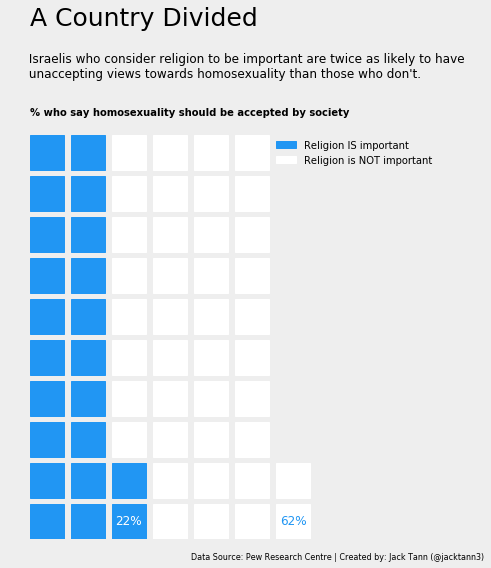

In [14]:
import pandas as pd
from pywaffle import Waffle

fig = plt.figure(
    FigureClass = Waffle,
    rows=10, 
    columns=10, 
    # values=[22, 40, 38],
    values = {'Religion IS important': 22, 'Religion is NOT important': 40, '': 38},
    colors=("#2196f3", "white", "#EEEEEE"),
    legend={'framealpha': 0, 'bbox_to_anchor': (1.02, 1.01)},
    figsize=(8, 8),
)
fig.set_facecolor('#EEEEEE')
plt.title('A Country Divided', loc = 'left', fontdict = {'fontsize': 25}, pad = 110)
plt.suptitle("""\n\n\n Israelis who consider religion to be important are twice as likely to have \n unaccepting views towards homosexuality than those who don't.""", ha = 'left', x = 0.05)
plt.text(0, 1.05, '% who say homosexuality should be accepted by society', color = 'black', fontweight = 'bold')
plt.text(0.21, 0.035, '22%', color = 'white', fontsize = 12)
plt.text(0.62, 0.035, '62%', color = "#2196f3", fontsize = 12)
plt.text(0.4, -0.05, 'Data Source: Pew Research Centre | Created by: Jack Tann (@jacktann3)', fontsize = 8)
plt.show()